# Анализ тарифов оператора сотовой связи #

**Описание проекта:**
Объект исследования - компания «Мегалайн», федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Небходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Предоставлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов:**
1. Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля, сообщение: 3 рубля, 1 Гб интернет-трафика: 200 рублей
2. Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль, сообщение: 1 рубль, 1 Гб интернет-трафика: 150 рублей

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Цель исследования - проверить следующие гипотезы:**
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Исследование пройдет в несколько этапов:**
1. Обзор данных;
2. Предобработка данных;
3. Анализ данных;
4. Проверка гипотез;
5. Подведение итогов (вывод).

## Обзор данных ##

Для начала импортируем необходимые для работы библиотеки, запишем наши данные в переменные, откроем их и просмотрим информацию о них.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math

In [2]:
try:
    calls_df = pd.read_csv ('calls.csv')
    internet_df = pd.read_csv ('internet.csv', index_col=0)
    messages_df = pd.read_csv ('messages.csv')
    tariffs_df = pd.read_csv ('tariffs.csv')
    users_df = pd.read_csv ('users.csv')
except:
    calls_df = pd.read_csv('/datasets/calls.csv') 
    internet_df = pd.read_csv('/datasets/internet.csv', index_col=0) 
    messages_df = pd.read_csv('/datasets/messages.csv') 
    tariffs_df = pd.read_csv('/datasets/tariffs.csv') 
    users_df = pd.read_csv('/datasets/users.csv') 

In [4]:
display ('Таблица calls_df')
display (calls_df.head())
display ('Таблица internet_df')
display (internet_df.head())
display ('Таблица messages_df')
display (messages_df.head())
display ('Таблица tariffs_df')
display (tariffs_df.head())
display ('Таблица users_df')
display (users_df.head())

'Таблица calls_df'

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


'Таблица internet_df'

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


'Таблица messages_df'

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


'Таблица tariffs_df'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


'Таблица users_df'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [5]:
display ('Таблица calls_df')
display (calls_df.info())
display ('Таблица internet_df')
display (internet_df.info())
display ('Таблица messages_df')
display (messages_df.info())
display ('Таблица tariffs_df')
display (tariffs_df.info())
display ('Таблица users_df')
display (users_df.info())

'Таблица calls_df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

'Таблица internet_df'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

'Таблица messages_df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

'Таблица tariffs_df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

'Таблица users_df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [6]:
display ('Таблица calls_df')
display (calls_df.describe().T)
display ('Таблица internet_df')
display (internet_df.describe().T)
display ('Таблица messages_df')
display (messages_df.describe().T)
display ('Таблица tariffs_df')
display (tariffs_df.describe().T)
display ('Таблица users_df')
display (users_df.describe().T)

'Таблица calls_df'

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


'Таблица internet_df'

,count,mean,std,min,25%,50%,75%,max
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


'Таблица messages_df'

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


'Таблица tariffs_df'

,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


'Таблица users_df'

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


**Описание данных:**
1. Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя. Тип - int64, подходит значениям столбца.
* first_name — имя пользователя. Тип - object, подходит значениям столбца.
* last_name — фамилия пользователя. Тип - object, подходит значениям столбца.
* age — возраст пользователя (годы). Тип - int64, подходит значениям столбца.
* reg_date — дата подключения тарифа (день, месяц, год). Тип - object, необходимо изменение типа данных для корректной работы с ними.
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных) Тип - object, необходимо изменение типа данных для корректной работы с ними.
* city — город проживания пользователя.  Тип - object, подходит значениям столбца.
* tariff — название тарифного плана. Тип - object, так как у нас всего два названия, возможно при предобработке данных будет целесообразно сменить тип на bool, или ввести числовые идентификаторы.
2. Таблица calls (информация о звонках):
* id — уникальный номер звонка. Тип - object, подходит значениям столбца.
* call_date — дата звонка. Тип - object, необходимо изменение типа данных для корректной работы с ними.
* duration — длительность звонка в минутах. Тип - float64, необходимо изменение типа данных для корректной работы с ними, с округление до большего значения.
* user_id — идентификатор пользователя, сделавшего звонок. Тип - int64, подходит значениям столбца.
3. Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения. Тип - object, подходит значениям столбца.
* message_date — дата сообщения. Тип - object, необходимо изменение типа данных для корректной работы с ними.
* user_id — идентификатор пользователя, отправившего сообщение. Тип - int64, подходит значениям столбца.
4. Таблица internet (информация об интернет-сессиях):
Также видим столбец без названия. Предположительно, он хранит индексы строк.
* id — уникальный номер сессии. Тип - object, подходит значениям столбца.Тип - object, возможно при предобработке данных необходимо изменение типа данных для корректной работы с ними.
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах). Тип - float64, необходимо изменение типа данных для корректной работы с ними, с округление до большего значения.
* session_date — дата интернет-сессии. Тип - object, необходимо изменение типа данных для корректной работы с ними.
* user_id — идентификатор пользователя. Тип - int64, подходит значениям столбца.
5. Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа. Тип - object, подходит значениям столбца.
* rub_monthly_fee — ежемесячная абонентская плата в рублях. Тип - int64, подходит значениям столбца.
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату. Тип - int64, подходит значениям столбца.
* messages_included — количество сообщений в месяц, включённых в абонентскую плату. Тип - int64, подходит значениям столбца.
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах). Тип - int64, подходит значениям столбца.
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата). Тип - int64, подходит значениям столбца.
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета. Тип - int64, подходит значениям столбца.
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта). Тип - int64, подходит значениям столбца.

### Вывод ###

1. Название столбца mb_per_month_included некорректное, его необходимо переменовать (в названии есть конструкция "per_month", в аналогичных столбцах для минут и сообщений она отсутствует). Также переименуем столбец tariff таблицы users_df в tariff_name, как и в таблице tariffs_df для удобства.
2. Имеются столбцы с неправильными типами данных, также их значения необходимо округлить в большую сторону.
3. Кроме заявленных в описании, пропусков в данных не имеется.

In [7]:
print (users_df ['user_id'].value_counts())
print('-------------')
print (calls_df ['user_id'].value_counts())
print('-------------')
print (messages_df ['user_id'].value_counts())
print('-------------')
print (internet_df ['user_id'].value_counts())


1024    1
1353    1
1366    1
1365    1
1364    1
       ..
1185    1
1184    1
1183    1
1182    1
1023    1
Name: user_id, Length: 500, dtype: int64
-------------
1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64
-------------
1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1111       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64
-------------
1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64


In [8]:
not_in_cal = []
not_in_msg = []
not_in_int = []
for id in users_df['user_id'].sort_values().unique():
    if id not in calls_df['user_id'].unique():
        not_in_cal.append(id)
    if id not in messages_df['user_id'].unique():
        not_in_msg.append(id)
    if id not in internet_df['user_id'].unique():
        not_in_int.append(id)
print (not_in_cal)
print (not_in_msg)
print (not_in_int)

[1091, 1106, 1128, 1231, 1328, 1371, 1473, 1489]
[1001, 1006, 1010, 1017, 1024, 1040, 1049, 1053, 1063, 1078, 1085, 1095, 1101, 1107, 1114, 1116, 1117, 1118, 1120, 1128, 1129, 1132, 1143, 1152, 1153, 1157, 1162, 1175, 1177, 1179, 1185, 1195, 1201, 1204, 1208, 1210, 1220, 1224, 1225, 1228, 1240, 1242, 1248, 1254, 1255, 1260, 1290, 1291, 1292, 1297, 1301, 1305, 1306, 1322, 1334, 1339, 1360, 1363, 1367, 1370, 1371, 1376, 1388, 1397, 1428, 1429, 1435, 1442, 1456, 1462, 1466, 1469, 1479, 1494]
[1128, 1273, 1371]


In [9]:
not_in_tables = []

for id_cal in not_in_cal:
    for id_msg in not_in_msg:
        for id_int in not_in_int:
            if id_cal == id_msg and id_cal  == id_int and id_msg == id_int:
                not_in_tables.append (id_cal)
                
not_in_tables

[1128, 1371]

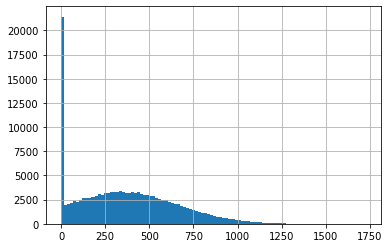

In [10]:
internet_df ['mb_used'].hist(bins = 100);

## Предобработка данных ##

### Замена названия столбца ###

Заменим названия с помощью метода .rename ().

In [11]:
tariffs_df.rename(columns={'mb_per_month_included': 'mb_included'}, inplace=True)
users_df.rename(columns={'tariff': 'tariff_name'}, inplace=True)

display (tariffs_df.head())
display (users_df.head())

,messages_included,mb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Замена типов данных ###

Приведем некорректные типы данных к правильным с помощью функции pd.to_datetime ()

In [12]:
users_df['churn_date'] = pd.to_datetime (users_df['churn_date'], format="%Y-%m-%d")
users_df['reg_date'] = pd.to_datetime (users_df['reg_date'], format="%Y-%m-%d")
internet_df['session_date'] = pd.to_datetime (internet_df['session_date'], format="%Y-%m-%d")
calls_df['call_date'] = pd.to_datetime (calls_df['call_date'], format="%Y-%m-%d")
messages_df['message_date'] = pd.to_datetime (messages_df['message_date'], format="%Y-%m-%d")

Теперь нам необходимо привести к целочисленному типу те столбцы, в которых необходимо округление в большую сторону.
Если мы при подсчете затраченных услуг, округляем Мб до Гб, и расценки указаны в Гб, удобнее будет вести подсчеты сразу в Гб.

In [13]:
calls_df['duration'] = np.ceil(calls_df['duration'])

In [14]:
internet_df['mb_used'] /= 1024

In [15]:
internet_df.rename(columns={'mb_used': 'gb_used'}, inplace=True)

In [16]:
tariffs_df['mb_included'] /= 1024

In [17]:
tariffs_df.rename(columns={'mb_included': 'gb_included'}, inplace=True)

### Проверка на дубликаты и аномалии в данных ###

Проверим данные на дубликаты с помощью метода .duplicated().

In [18]:
print (calls_df[calls_df.duplicated() == True])
print (internet_df[internet_df.duplicated() == True])
print (users_df[users_df.duplicated() == True])
print (messages_df[messages_df.duplicated() == True])

Empty DataFrame
Columns: [id, call_date, duration, user_id]
Index: []
Empty DataFrame
Columns: [id, gb_used, session_date, user_id]
Index: []
Empty DataFrame
Columns: [user_id, age, churn_date, city, first_name, last_name, reg_date, tariff_name]
Index: []
Empty DataFrame
Columns: [id, message_date, user_id]
Index: []


Одну аномалию мы уже нашли - безымянный столбец в таблице internet_df. Вывидем списки и уникальные значения столбцов, чтобы проверить их на наличие аномальных значений.

In [19]:
def unique (df):
    for column in df.columns:
        print(column)
        print (df[column].unique())
        print ('--------------------------')
    return
unique (users_df)

user_id
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 119

In [20]:
unique (calls_df)

id
['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']
--------------------------
call_date
['2018-07-25T00:00:00.000000000' '2018-08-17T00:00:00.000000000'
 '2018-06-11T00:00:00.000000000' '2018-09-21T00:00:00.000000000'
 '2018-12-15T00:00:00.000000000' '2018-11-02T00:00:00.000000000'
 '2018-10-18T00:00:00.000000000' '2018-08-22T00:00:00.000000000'
 '2018-09-15T00:00:00.000000000' '2018-08-15T00:00:00.000000000'
 '2018-05-28T00:00:00.000000000' '2018-07-05T00:00:00.000000000'
 '2018-09-29T00:00:00.000000000' '2018-12-11T00:00:00.000000000'
 '2018-07-27T00:00:00.000000000' '2018-08-11T00:00:00.000000000'
 '2018-08-02T00:00:00.000000000' '2018-06-15T00:00:00.000000000'
 '2018-12-04T00:00:00.000000000' '2018-08-20T00:00:00.000000000'
 '2018-09-25T00:00:00.000000000' '2018-07-21T00:00:00.000000000'
 '2018-08-27T00:00:00.000000000' '2018-08-25T00:00:00.000000000'
 '2018-12-12T00:00:00.000000000' '2018-07-19T00:00:00.000000000'
 '2018-11-14T00:00:00.000000000' '2018-12-26T00:0

In [21]:
unique (messages_df)

id
['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']
--------------------------
message_date
['2018-06-27T00:00:00.000000000' '2018-10-08T00:00:00.000000000'
 '2018-08-04T00:00:00.000000000' '2018-06-16T00:00:00.000000000'
 '2018-12-05T00:00:00.000000000' '2018-06-20T00:00:00.000000000'
 '2018-11-19T00:00:00.000000000' '2018-10-29T00:00:00.000000000'
 '2018-06-25T00:00:00.000000000' '2018-12-18T00:00:00.000000000'
 '2018-05-30T00:00:00.000000000' '2018-07-06T00:00:00.000000000'
 '2018-08-20T00:00:00.000000000' '2018-10-30T00:00:00.000000000'
 '2018-09-14T00:00:00.000000000' '2018-08-28T00:00:00.000000000'
 '2018-06-29T00:00:00.000000000' '2018-07-07T00:00:00.000000000'
 '2018-05-29T00:00:00.000000000' '2018-05-28T00:00:00.000000000'
 '2018-08-15T00:00:00.000000000' '2018-07-29T00:00:00.000000000'
 '2018-12-07T00:00:00.000000000' '2018-12-25T00:00:00.000000000'
 '2018-10-31T00:00:00.000000000' '2018-07-30T00:00:00.000000000'
 '2018-11-05T00:00:00.000000000' '2018-12-15T0

In [22]:
unique (internet_df)

id
['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']
--------------------------
gb_used
[0.11030273 1.02813477 1.16919922 ... 0.44995117 0.24178711 0.02316406]
--------------------------
session_date
['2018-11-25T00:00:00.000000000' '2018-09-07T00:00:00.000000000'
 '2018-06-25T00:00:00.000000000' '2018-08-22T00:00:00.000000000'
 '2018-09-24T00:00:00.000000000' '2018-10-02T00:00:00.000000000'
 '2018-07-11T00:00:00.000000000' '2018-10-08T00:00:00.000000000'
 '2018-09-03T00:00:00.000000000' '2018-09-27T00:00:00.000000000'
 '2018-08-28T00:00:00.000000000' '2018-06-20T00:00:00.000000000'
 '2018-08-09T00:00:00.000000000' '2018-08-11T00:00:00.000000000'
 '2018-07-21T00:00:00.000000000' '2018-06-09T00:00:00.000000000'
 '2018-06-03T00:00:00.000000000' '2018-11-01T00:00:00.000000000'
 '2018-11-28T00:00:00.000000000' '2018-08-20T00:00:00.000000000'
 '2018-12-06T00:00:00.000000000' '2018-07-02T00:00:00.000000000'
 '2018-10-19T00:00:00.000000000' '2018-10-30T00:00:00.000000000'
 '20

Никаких других аномалий больше не обнаружено. Безыменянный столбец был удален: в ячейке с записью переменной internet_df был добавлен параметр index_col=0.

## Анализ данных ##

Нужно посчитать для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

Необходимо узнать, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Затем посчитать среднее количество, дисперсию и стандартное отклонение, визуализировать полученную информацию с помощью гистограмм и описать распределения.

Для этого разделим наши таблицы на пользователей тарифа "Смарт" и "Ультра", и для проверки гипотезы в будущем, на пользователей Москвы и других городов.

Для начала добавим в таблицы calls_df, messages_df и internet_df столбец с месяцем, чтобы можно было сгруппировать таблицы по пользователю и узнать, сколько тот тратит в месяц, и как часто траты выходят за лимиты тарифа.

In [23]:
calls_df['month'] = calls_df['call_date'].dt.month
messages_df['month'] = messages_df['message_date'].dt.month
internet_df['month'] = internet_df['session_date'].dt.month

In [24]:
smart_users = users_df[users_df['tariff_name'] == 'smart']['user_id']
ultra_users = users_df[users_df['tariff_name'] == 'ultra']['user_id']

moscow_users = users_df[users_df['city'] == 'Москва']['user_id']
other_users = users_df[users_df['city'] != 'Москва']['user_id']

In [25]:
calls_df_smart = calls_df.query ('user_id in @smart_users')
calls_df_ultra = calls_df.query ('user_id in @ultra_users')
messages_df_smart = messages_df.query ('user_id in @smart_users')
messages_df_ultra = messages_df.query ('user_id in @ultra_users')
internet_df_smart = internet_df.query ('user_id in @smart_users')
internet_df_ultra = internet_df.query ('user_id in @ultra_users')

calls_df_moscow = calls_df.query ('user_id in @moscow_users')
calls_df_other = calls_df.query ('user_id in @other_users')
messages_df_moscow = messages_df.query ('user_id in @moscow_users')
messages_df_other = messages_df.query ('user_id in @other_users')
internet_df_moscow = internet_df.query ('user_id in @moscow_users')
internet_df_other = internet_df.query ('user_id in @other_users')

Теперь сгруппируем таблицы по столбцам user_id и month (необходимо для расчетов) и объединим их, чтобы было удобнее работать с данными, в одной таблице.

In [26]:
calls_df_grouped = calls_df.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = ('sum', 'count'))
messages_df_grouped = messages_df.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
internet_df_grouped = internet_df.pivot_table(index = ['user_id','month'], values = 'gb_used', aggfunc = 'sum')

calls_df_smart_grouped = calls_df_smart.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = ('sum', 'count'))
messages_df_smart_grouped = messages_df_smart.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
internet_df_smart_grouped = internet_df_smart.pivot_table(index = ['user_id','month'], values = 'gb_used', aggfunc = 'sum')

calls_df_ultra_grouped = calls_df_ultra.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = ('sum', 'count'))
messages_df_ultra_grouped = messages_df_ultra.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
internet_df_ultra_grouped = internet_df_ultra.pivot_table(index = ['user_id','month'], values = 'gb_used', aggfunc = 'sum')

calls_df_moscow_grouped = calls_df_moscow.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = ('sum', 'count'))
messages_df_moscow_grouped = messages_df_moscow.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
internet_df_moscow_grouped = internet_df_moscow.pivot_table(index = ['user_id','month'], values = 'gb_used', aggfunc = 'sum')

calls_df_other_grouped = calls_df_other.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = ('sum', 'count'))
messages_df_other_grouped = messages_df_other.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
internet_df_other_grouped = internet_df_other.pivot_table(index = ['user_id','month'], values = 'gb_used', aggfunc = 'sum')


In [27]:
users_df.loc[(users_df['user_id'] == 1128) | (users_df['user_id'] == 1371)]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


In [28]:
without_service = {'user_id': [1128, 1371], 'month': [12, 12], 'calls_count': [0, 0], 'duration_sum': [0, 0], 'messages_count': [0, 0], 'gb_used': [0, 0]}

without_service_df = pd.DataFrame(data=without_service)

In [29]:
without_service_df_grouped = without_service_df.pivot_table(index = ['user_id','month'], values = ['calls_count', 'duration_sum', 'messages_count', 'gb_used'], aggfunc = 'sum')

In [30]:
display(without_service_df_grouped)

,,calls_count,duration_sum,gb_used,messages_count
user_id,month,,,,
1128,12,0,0,0,0
1371,12,0,0,0,0


Также после объединения зададим удобные названия для столбцов.

In [31]:
general_df = calls_df_grouped.join( [messages_df_grouped, internet_df_grouped], how='outer').fillna(0)
general_df.columns = [['calls_count', 'duration_sum', 'messages_count', 'gb_used']]
general_df_moscow = calls_df_moscow_grouped.join([messages_df_moscow_grouped, internet_df_moscow_grouped], how='outer').fillna(0)

len(general_df.index.get_level_values(0).unique())

498

In [32]:
general_df = general_df.join(without_service_df_grouped, how='outer').fillna(0)

In [33]:
len(general_df.index.get_level_values(0).unique())

500

In [34]:
general_df['gb_used'] = np.ceil (general_df['gb_used'])

In [35]:
general_df

(calls_count,)  (duration_sum,)  (messages_count,)  (gb_used,)  \
user_id month                                                                   
1000    5                22.0            159.0               22.0    2.200674   
        6                43.0            172.0               60.0   22.689229   
        7                47.0            340.0               75.0   13.675430   
        8                52.0            408.0               81.0   13.726494   
        9                58.0            466.0               57.0   14.227451   
...                       ...              ...                ...         ...   
1498    10               41.0            247.0               42.0   20.097031   
1499    9                 9.0             70.0               11.0    1.802490   
        10               68.0            449.0               48.0   17.371592   
        11               74.0            612.0               59.0   17.542295   
        12               69.0            492.0               66.0   12.749590   

               calls_count  duration_sum  gb_used  messages_count  
user_id month                                                      
1000    5              0.0           0.0      0.0             0.0  
        6              0.0           0.0      0.0             0.0  
        7              0.0           0.0      0.0             0.0  
        8              0.0           0.0      0.0             0.0  
        9              0.0           0.0      0.0             0.0  
...                    ...           ...      ...             ...  
1498    10             0.0           0.0      0.0             0.0  
1499    9              0.0           0.0      0.0             0.0  
        10             0.0           0.0      0.0             0.0  
        11             0.0           0.0      0.0             0.0  
        12             0.0           0.0      0.0             0.0  

[3216 rows x 8 columns]

In [36]:
del general_df['calls_count']
del general_df['duration_sum']
del general_df['gb_used']
del general_df['messages_count']

In [37]:
general_df.columns = [['calls_count', 'duration_sum', 'messages_count', 'gb_used']]
general_df

calls_count duration_sum messages_count    gb_used
user_id month                                                   
1000    5            22.0        159.0           22.0   2.200674
        6            43.0        172.0           60.0  22.689229
        7            47.0        340.0           75.0  13.675430
        8            52.0        408.0           81.0  13.726494
        9            58.0        466.0           57.0  14.227451
...                   ...          ...            ...        ...
1498    10           41.0        247.0           42.0  20.097031
1499    9             9.0         70.0           11.0   1.802490
        10           68.0        449.0           48.0  17.371592
        11           74.0        612.0           59.0  17.542295
        12           69.0        492.0           66.0  12.749590

[3216 rows x 4 columns]

In [38]:
general_df_smart = calls_df_smart_grouped.join([messages_df_smart_grouped, internet_df_smart_grouped], how='outer').fillna(0)
general_df_smart.columns = [['calls_count', 'duration_sum', 'messages_count', 'gb_used']]
general_df_smart['gb_used'] = np.ceil (general_df_smart['gb_used'])

general_df_ultra = calls_df_ultra_grouped.join([messages_df_ultra_grouped, internet_df_ultra_grouped], how='outer').fillna(0)
general_df_ultra.columns = [['calls_count', 'duration_sum', 'messages_count', 'gb_used']]
general_df_ultra['gb_used'] = np.ceil (general_df_ultra['gb_used'])

general_df_moscow = calls_df_moscow_grouped.join([messages_df_moscow_grouped, internet_df_moscow_grouped], how='outer').fillna(0)
general_df_moscow.columns = [['calls_count', 'duration_sum', 'messages_count', 'gb_used']]
general_df_moscow['gb_used'] = np.ceil (general_df_moscow['gb_used'])

general_df_other = calls_df_other_grouped.join([messages_df_other_grouped, internet_df_other_grouped], how='outer').fillna(0)
general_df_other.columns = [['calls_count', 'duration_sum', 'messages_count', 'gb_used']]
general_df_other['gb_used'] = np.ceil (general_df_other['gb_used'])

In [39]:
general_df_smart.head()

calls_count duration_sum messages_count gb_used
user_id month                                                
1001    11           59.0        430.0            0.0    18.0
        12           63.0        414.0            0.0    14.0
1002    6            15.0        117.0            4.0    11.0
        7            26.0        214.0           11.0    18.0
        8            42.0        289.0           13.0    20.0

In [40]:
general_df_ultra.head()

calls_count duration_sum messages_count gb_used
user_id month                                                
1000    5            22.0        159.0           22.0     3.0
        6            43.0        172.0           60.0    23.0
        7            47.0        340.0           75.0    14.0
        8            52.0        408.0           81.0    14.0
        9            58.0        466.0           57.0    15.0

In [41]:
general_df_moscow.head()

calls_count duration_sum messages_count gb_used
user_id month                                                
1001    11           59.0        430.0            0.0    18.0
        12           63.0        414.0            0.0    14.0
1003    8            55.0        380.0           37.0     9.0
        9           134.0        961.0           91.0    13.0
        10          108.0        855.0           83.0    15.0

In [42]:
general_df_other.head()

calls_count duration_sum messages_count gb_used
user_id month                                                
1000    5            22.0        159.0           22.0     3.0
        6            43.0        172.0           60.0    23.0
        7            47.0        340.0           75.0    14.0
        8            52.0        408.0           81.0    14.0
        9            58.0        466.0           57.0    15.0

### Расчет затраченных услуг для каждого пользователя ###

Теперь нужно найти помесячную выручку с каждого пользователя. Расчет выручки зависит от тарифа пользователя. Напишем функцию для ее расчета.

In [43]:
def tariff_name (row):
    result = ( users_df[users_df['user_id'] == row.name[0]]['tariff_name'].index[0])
    return users_df.loc[result,'tariff_name']
        
general_df['tariff_name'] = general_df.apply(tariff_name, axis = 1)
general_df_moscow['tariff_name'] = general_df_moscow.apply(tariff_name, axis = 1)
general_df_other['tariff_name'] = general_df_other.apply(tariff_name, axis = 1)

Мы добавили значения тарифа и города для каждого пользователя в таблицу, теперь создадим функцию для расчета выручки.

In [44]:
def total (row):
    result = 0
    if row['tariff_name'] == 'smart':
        if row['duration_sum'] > tariffs_df.loc[0,'minutes_included']:
            result_min = (row['duration_sum'] - tariffs_df.loc[0,'minutes_included']) * tariffs_df.loc[0,'rub_per_minute']
            result += result_min
        if row['messages_count'] > tariffs_df.loc[0,'messages_included']:
            result_mes = (row['messages_count'] - tariffs_df.loc[0,'messages_included']) * tariffs_df.loc[0,'rub_per_message']
            result += result_mes
        if row['gb_used'] > tariffs_df.loc[0,'gb_included']:
            result_gb = (row['gb_used'] - tariffs_df.loc[0,'gb_included']) * tariffs_df.loc[0,'rub_per_gb']
            result += result_gb
        result += tariffs_df.loc[0,'rub_monthly_fee']
        return result
    else:
        if row['duration_sum'] > tariffs_df.loc[1,'minutes_included']:
            result_min = (row['duration_sum'] - tariffs_df.loc[1,'minutes_included']) * tariffs_df.loc[1,'rub_per_minute']
            result += result_min
        if row['messages_count'] > tariffs_df.loc[1,'messages_included']:
            result_mes = (row['messages_count'] - tariffs_df.loc[1,'messages_included']) * tariffs_df.loc[1,'rub_per_message']
            result += result_mes
        if row['gb_used'] > tariffs_df.loc[1,'gb_included']:
            result_gb = (row['gb_used'] - tariffs_df.loc[1,'gb_included']) * tariffs_df.loc[1,'rub_per_gb']
            result += result_gb
        result += tariffs_df.loc[1,'rub_monthly_fee']
        return result

#general_df['total'] = general_df.apply (total, axis=1)

In [45]:
def total_for_smart (row):
    result = 0
    if row['duration_sum'] > tariffs_df.loc[0,'minutes_included']:
        result_min = (row['duration_sum'] - tariffs_df.loc[0,'minutes_included']) * tariffs_df.loc[0,'rub_per_minute']
        result += result_min
    if row['messages_count'] > tariffs_df.loc[0,'messages_included']:
        result_mes = (row['messages_count'] - tariffs_df.loc[0,'messages_included']) * tariffs_df.loc[0,'rub_per_message']
        result += result_mes
    if row['gb_used'] > tariffs_df.loc[0,'gb_included']:
        result_gb = (row['gb_used'] - tariffs_df.loc[0,'gb_included']) * tariffs_df.loc[0,'rub_per_gb']
        result += result_gb
    result += tariffs_df.loc[0,'rub_monthly_fee']
    return result

In [46]:
def total_for_ultra (row):
    result = 0
    if row['duration_sum'] > tariffs_df.loc[1,'minutes_included']:
        result_min = (row['duration_sum'] - tariffs_df.loc[1,'minutes_included']) * tariffs_df.loc[1,'rub_per_minute']
        result += result_min
    if row['messages_count'] > tariffs_df.loc[1,'messages_included']:
        result_mes = (row['messages_count'] - tariffs_df.loc[1,'messages_included']) * tariffs_df.loc[1,'rub_per_message']
        result += result_mes
    if row['gb_used'] > tariffs_df.loc[1,'gb_included']:
        result_gb = (row['gb_used'] - tariffs_df.loc[1,'gb_included']) * tariffs_df.loc[1,'rub_per_gb']
        result += result_gb
    result += tariffs_df.loc[1,'rub_monthly_fee']
    return result

In [47]:
general_df['total'] = general_df.apply (total, axis=1)
general_df_moscow['total'] = general_df_moscow.apply (total, axis=1)
general_df_other['total'] = general_df_other.apply (total, axis=1)
general_df_smart['total'] = general_df_smart.apply (total_for_smart, axis=1)
general_df_ultra['total'] = general_df_ultra.apply (total_for_ultra, axis=1)

In [48]:
general_df.head()

calls_count duration_sum messages_count    gb_used tariff_name  \
user_id month                                                                  
1000    5            22.0        159.0           22.0   2.200674       ultra   
        6            43.0        172.0           60.0  22.689229       ultra   
        7            47.0        340.0           75.0  13.675430       ultra   
        8            52.0        408.0           81.0  13.726494       ultra   
        9            58.0        466.0           57.0  14.227451       ultra   

                total  
user_id month          
1000    5      1950.0  
        6      1950.0  
        7      1950.0  
        8      1950.0  
        9      1950.0

In [49]:
# check
general_df['total'].sum()

total    4.774127e+06
dtype: float64

In [50]:
# check
general_df.tail(4)

calls_count duration_sum messages_count    gb_used tariff_name  \
user_id month                                                                  
1499    9             9.0         70.0           11.0   1.802490       smart   
        10           68.0        449.0           48.0  17.371592       smart   
        11           74.0        612.0           59.0  17.542295       smart   
        12           69.0        492.0           66.0  12.749590       smart   

                     total  
user_id month               
1499    9       550.000000  
        10     1024.318359  
        11     1421.458984  
        12      598.000000

In [51]:
# check
general_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3216 entries, (1000, 5) to (1499, 12)
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (calls_count,)     3216 non-null   float64
 1   (duration_sum,)    3216 non-null   float64
 2   (messages_count,)  3216 non-null   float64
 3   (gb_used,)         3216 non-null   float64
 4   (tariff_name,)     3216 non-null   object 
 5   (total,)           3216 non-null   float64
dtypes: float64(5), object(1)
memory usage: 180.7+ KB


In [52]:
general_df['gb_used']

gb_used
user_id month           
1000    5       2.200674
        6      22.689229
        7      13.675430
        8      13.726494
        9      14.227451
...                  ...
1498    10     20.097031
1499    9       1.802490
        10     17.371592
        11     17.542295
        12     12.749590

[3216 rows x 1 columns]

Видно, что по объему минут и сообщений, превышений практически не встречается, зато по количеству использованного интернет-трафика превышений очень много.

### Расчет статистических характеристик в зависимости от тарифа ###

Найдем среднее значение для каждой таблицы и стандартное отклонение:

In [54]:
general_df.describe().T[['mean','std']]

,mean,std
calls_count,62.999689,33.263185
duration_sum,450.964241,242.096312
messages_count,38.257463,36.149684
gb_used,16.793859,7.403081
total,1484.492187,782.873095


In [55]:
general_df_smart.describe().T[['mean','std']]

,mean,std
calls_count,58.463437,25.939858
duration_sum,417.934948,190.313730
messages_count,33.384029,28.227876
gb_used,16.328847,5.747061
total,1289.973531,818.404367


In [56]:
general_df_ultra.describe().T[['mean','std']]

,mean,std
calls_count,73.392893,43.916853
duration_sum,526.623350,317.606098
messages_count,49.363452,47.804457
gb_used,19.494416,9.853511
total,2070.152284,376.187114


In [57]:
general_df_moscow.describe().T[['mean','std']]

,mean,std
calls_count,65.436989,33.186021
duration_sum,469.150573,241.535044
messages_count,37.877250,37.160304
gb_used,18.050736,7.645788
total,1546.713584,752.088071


In [58]:
general_df_other.describe().T[['mean','std']]

,mean,std
calls_count,62.475989,33.229464
duration_sum,447.041875,241.852152
messages_count,38.376104,35.913289
gb_used,17.122551,7.332184
total,1524.936227,808.787752


In [59]:
print (general_df_smart['total'].sum())
print (general_df_ultra['total'].sum())
print (general_df_moscow['total'].sum())
print (general_df_other['total'].sum())

total    2875351.0
dtype: float64
total    2039100.0
dtype: float64
total    945042.0
dtype: float64
total    3969409.0
dtype: float64


Попробуем теперь визуализировать полученное с помощью графиков. Для столбцов duration_sum и total напишем отдельный код, так как нужен другой диапазон значений.

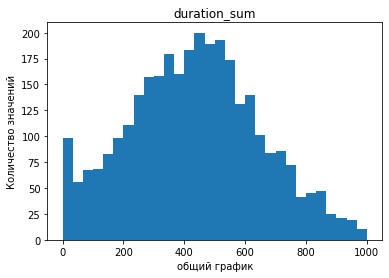

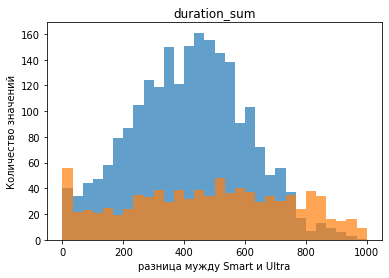

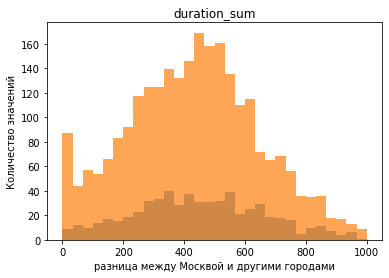

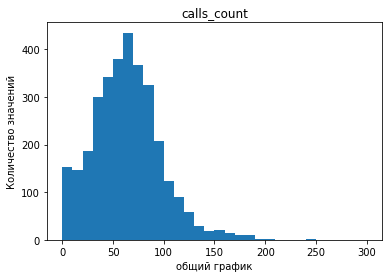

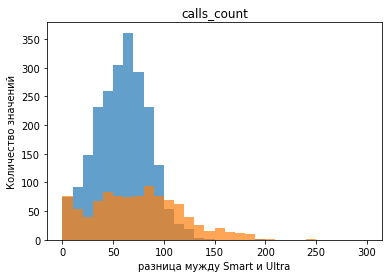

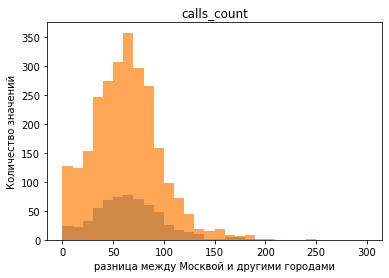

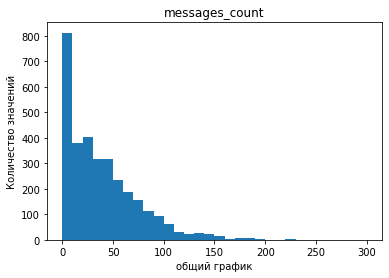

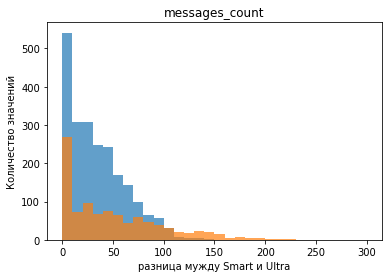

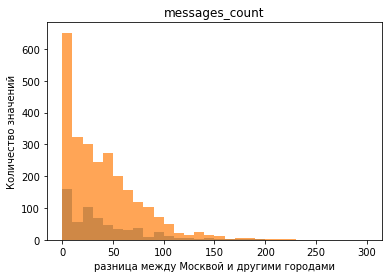

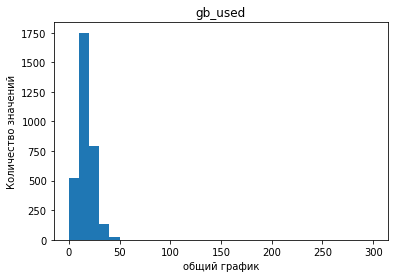

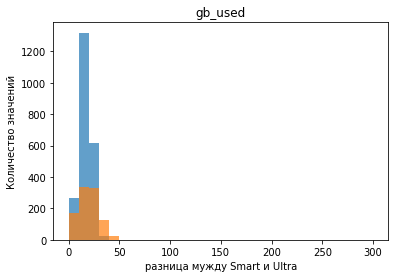

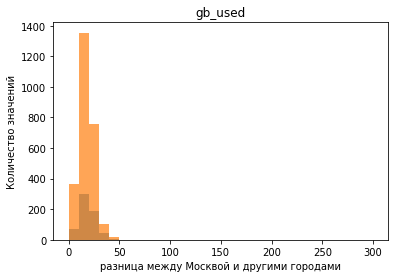

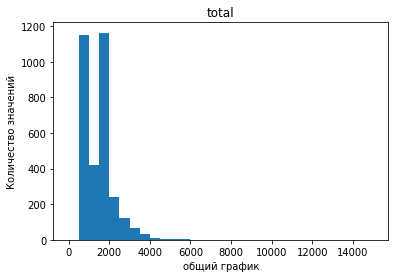

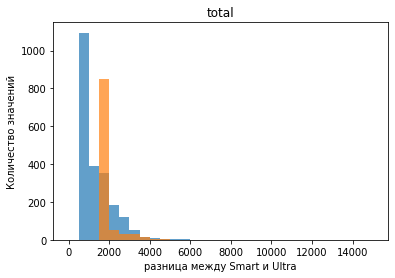

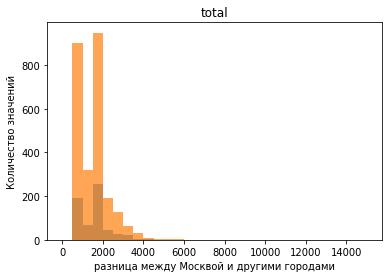

In [60]:
plt.hist(general_df['duration_sum'], bins=30, range=(0,1000))
plt.title('duration_sum')
plt.xlabel('общий график')
plt.ylabel('Количество значений')
plt.show()

plt.hist(general_df_smart['duration_sum'], bins=30, range=(0,1000), alpha=0.7)
plt.hist(general_df_ultra['duration_sum'], bins=30, range=(0,1000), alpha=0.7)
plt.title('duration_sum')
plt.xlabel('разница мужду Smart и Ultra')
plt.ylabel('Количество значений')
plt.show()

plt.hist(general_df_moscow['duration_sum'], bins=30, range=(0,1000), alpha=0.7)
plt.hist(general_df_other['duration_sum'], bins=30, range=(0,1000), alpha=0.7)
plt.title('duration_sum' )
plt.xlabel('разница между Москвой и другими городами')
plt.ylabel('Количество значений')
plt.show()
    
for value in ['calls_count', 'messages_count','gb_used']:
    plt.hist(general_df[value], bins=30, range=(0,300))
    plt.title(value)
    plt.xlabel('общий график')
    plt.ylabel('Количество значений')
    plt.show()

    plt.hist(general_df_smart[value], bins=30, range=(0,300), alpha=0.7)
    plt.hist(general_df_ultra[value], bins=30, range=(0,300), alpha=0.7)
    plt.title(value)
    plt.xlabel('разница мужду Smart и Ultra')
    plt.ylabel('Количество значений')
    plt.show()

    plt.hist(general_df_moscow[value], bins=30, range=(0,300), alpha=0.7)
    plt.hist(general_df_other[value], bins=30, range=(0,300), alpha=0.7)
    plt.title(value )
    plt.xlabel('разница между Москвой и другими городами')
    plt.ylabel('Количество значений')
    plt.show()
    
plt.hist(general_df['total'], bins=30, range=(0,15000))
plt.title('total')
plt.xlabel('общий график')
plt.ylabel('Количество значений')
plt.show()

plt.hist(general_df_smart['total'], bins=30, range=(0,15000), alpha=0.7)
plt.hist(general_df_ultra['total'], bins=30, range=(0,15000), alpha=0.7)
plt.title('total')
plt.xlabel('разница между Smart и Ultra')
plt.ylabel('Количество значений')
plt.show()

plt.hist(general_df_moscow['total'], bins=30, range=(0,15000), alpha=0.7)
plt.hist(general_df_other['total'], bins=30, range=(0,15000), alpha=0.7)
plt.title('total' )
plt.xlabel('разница между Москвой и другими городами')
plt.ylabel('Количество значений')
plt.show()

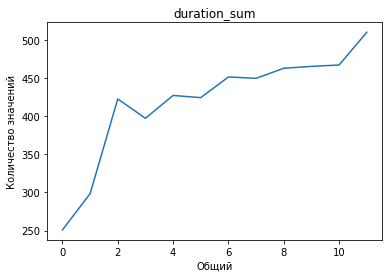

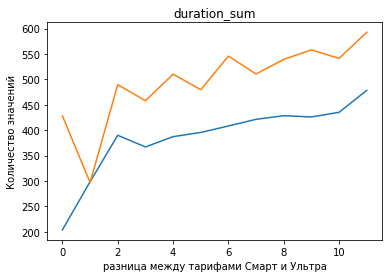

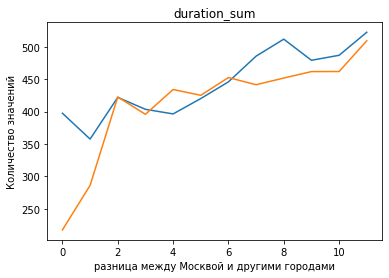

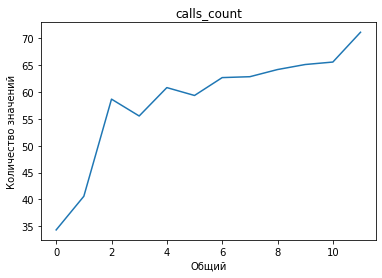

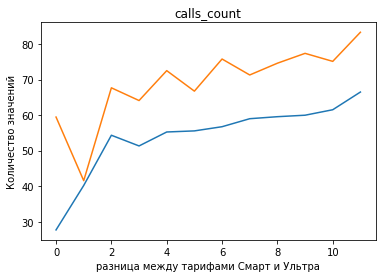

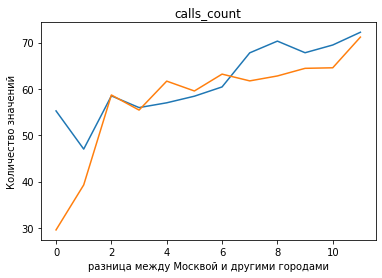

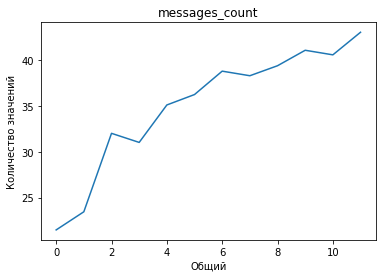

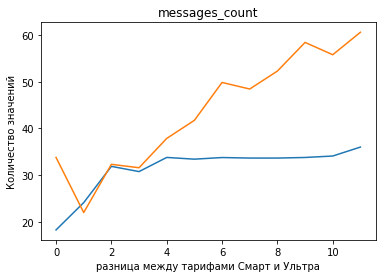

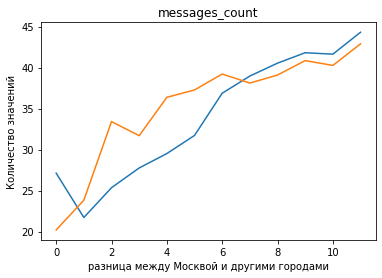

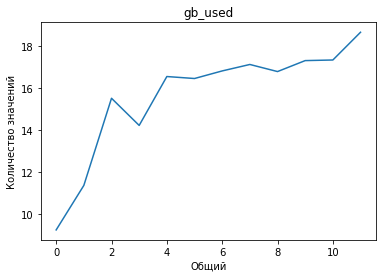

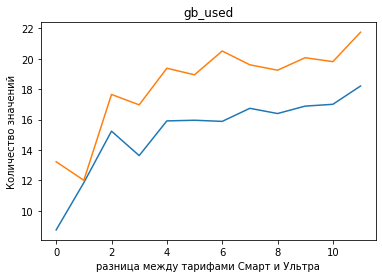

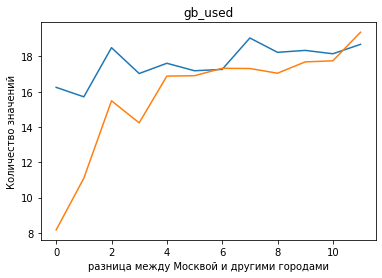

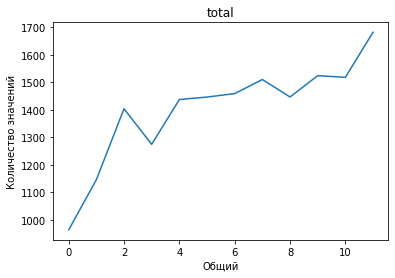

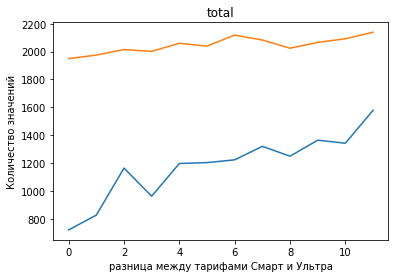

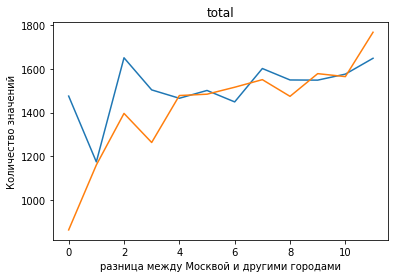

In [61]:
for value in ['duration_sum','calls_count', 'messages_count','gb_used', 'total']:

    general_df_month = general_df.pivot_table (index='month', values=value)
    general_df_smart_month = general_df_smart.pivot_table (index='month', values=value)
    general_df_ultra_month = general_df_ultra.pivot_table (index='month', values=value)
    general_df_moscow_month = general_df_moscow.pivot_table (index='month', values=value)
    general_df_other_month = general_df_other.pivot_table (index='month', values=value)

    plt.plot(np.array(general_df_month[value]))
    plt.title(value )
    plt.xlabel('Общий')
    plt.ylabel('Количество значений')
    plt.show()

    plt.plot(np.array(general_df_smart_month[value]))
    plt.plot(np.array(general_df_ultra_month[value]))
    plt.title(value )
    plt.xlabel('разница между тарифами Смарт и Ультра')
    plt.ylabel('Количество значений')
    plt.show()

    plt.plot(np.array(general_df_moscow_month[value]))
    plt.plot(np.array(general_df_other_month[value]))
    plt.title(value )
    plt.xlabel('разница между Москвой и другими городами')
    plt.ylabel('Количество значений')
    plt.show()

### Вывод ###

По статистическим характеристикам можно сделать следующие выводы:
1. duration sum

* Пользователи тарифа Ультра тратят на 23% большее количество минут, чем пользователи тарифа Смарт ((1-419)/545х100). У тарифа Ультра намного больше стандартное отклонение, это значит, что и разброс значений (дисперсия) тоже намного выше. При этом у пользователей тарифа Смарт включено в пакет 500 мин, а у пользователей тарифа Ультра - 3000 мин, практически никто из пользователей тарифа Ультра этот пакет полностью не использует. Используемое количество минут от всего пакета пользователями тарифа Смарт - 83,8% (419/500х100), пользователями тарифа Ультра - 18,2%. Вероятность того, что лимит будет превышен, намного выше у пользователей тарифа Смарт. При этом стоимость дополнительных услуг у этого тарифа также в 2,5 раз выше, что создает предположение, что тариф Смарт приносит больше денег. Это подтверждают графики, на которых мы видим, что количество людей, пользующихся этим тарифом, приблизительно в два раза больше, чем людей, пользующихся тарифом Ультра. Гистограмма тарифа Смарт немного скошена вправо, имеет распределение близкое к нормальному, распределение графика тарифа Ультра более линейное. На линейном графике видно, что до февраля у тарифа Смарт наблюдался спад, после чего количество потраченных минут резко взлетело вверх.

* Пользователи Москвы тратят на 3% большее количество минут, чем пользователи других городов ((1-454)/470х100), что совсем незначительно. Стандартное отклонение практически не отличается.  Из этого можно сделать выводы, что люди тратят на звонки одинаковое количество времени и денег в независимости от города. На графике видим, что преобладающее число пользователей - из других городов. Гистограммы имеют нормальное распределение. На линейном графике видно, что до апреля преобладали пользователи из Москвы, но после число пользователей из других городов стремительно выросло.

* В целом число тратящихся пользователями минут растет.

2. calls count

* Среднее время звонка пользователя тарифа Смарт - 7,2 мин, тарифа Ультра - 7,1, что практически не отличается (419/58, 545/76). Также как и в количестве потраченных минут видим, что у пользователей тарифа Ультра намного выше стандартное отклонение, что говорит о большом разбросе значений. Обе гистограммы имеют близкое к нормальному распределение, скошены вправо.

* Среднее время звонка пользователя Москвы и других городов - 7,2, различия минимальны (469/65, 453/63). Также как и в количестве потраченных минут видим, что стандартное отклонение практически не различается. Обе гистограммы имеют близкое к нормальному распределение.

* Видим те же переломные моменты в феврале для Смарт и Ультра, и в апреля для Москвы и других городов. В целом количество совершаемых пользователями звонков растет.

3. messages count

* Пользователи тарифа Ультра тратят на 33% большее количество сообщений, чем пользователи тарифа Смарт ((1-33)/49х100). У тарифа Ультра намного больше стандартное отклонение, это значит, что и разброс значений (дисперсия) тоже намного выше. При этом у пользователей тарифа Смарт включено в пакет 50 сообщений, а у пользователей тарифа Ультра - 1000 сообщений, практически никто из пользователей тарифа Ультра этот пакет полностью не использует. Используемое количество сообщений от всего пакета пользователями тарифа Смарт - 66% (33/50х100), пользователями тарифа Ультра - 4,9%. Вероятность того, что лимит будет превышен, намного выше у пользователей тарифа Смарт. При этом стоимость дополнительных услуг у этого тарифа также в 2,5 раз выше, что создает предположение, что тариф Смарт приносит больше денег. Это подтверждают графики, на которых мы видим, что количество людей, пользующихся этим тарифом, приблизительно в два раза больше, чем людей, пользующихся тарифом Ультра. Обе истограммы имеют распределение Пуассона.

* Пользователи Москвы тратят на 3% большее количество сообщений, чем пользователи других городов ((1-37)/38х100), что совсем незначительно. Стандартное отклонение практически не отличается.  Из этого можно сделать выводы, что люди тратят на сообщения одинаковое количество времени и денег в независимости от города. На графике видим, что преобладающее число пользователей - из других городов. Гистограммы имеют распределение Пуассона. 

* Линейные графики растут со временем, видно, что до февраля наблюдался спад по количеству отправляемых сообщений пользователями тарифа Ультра и пользователями других городов, но потом ситуация улучшилась.

4. gb_used

* Пользователи тарифа Смарт тратят на 16% меньшее количество Гб, чем пользователи тарифа Ультра ((1-(3/19х100)). У тарифа Ультра в полтора раза больше стандартное отклонение, это значит, что и разброс значений (дисперсия) тоже выше. При этом у пользователей тарифа Смарт включено в пакет 15 Гб, а у пользователей тарифа Ультра - 30 Гб. Превышение лимита пользователями тарифа Смарт - 9,2% (1-(1,6/15х100)), пользователи тарифа Ультра не используют одну треть имеющегося трафика. Вероятность того, что лимит будет превышен, намного выше у пользователей тарифа Смарт. При этом стоимость дополнительных услуг у этого тарифа также в 0,5 раз выше, что создает предположение, что тариф Смарт приносит больше денег. Это подтверждают графики, на которых мы видим, что количество людей, пользующихся этим тарифом, приблизительно в два раза больше, чем людей, пользующихся тарифом Ультра. Обе гистограммы имеют распределение близкое к нормальному.

* Пользователи Москвы тратят и пользователи других городов тратят почти одинаковое количество Гб (18 и 17), и их стандартное отклонение также не отличается.  Из этого можно сделать выводы, что люди тратят на Гб одинаковое количество времени и денег в независимости от города. На графике видим, что преобладающее число пользователей - из других городов. Гистограммы имеют распределение близкое к нормальному.

* Видим резкий рост количества потребляемых Гб в феврале и апреле, потом графики становится менее крутыми

5. total

* Средняя прибыль пользователей тарифа Ультра на 62% больше, чем у пользователей тарифа Смарт ((1-1289/2070/х100). У тарифа Смарт больше чем в два раза стандартное отклонение, это значит, что и разброс значений (дисперсия) тоже выше. При этом у пользователей тарифа Смарт стоимость пакета 550 руб, а у пользователей тарифа Ультра - 1950 Гб. Переплата от пользователей тарифа Смарт - 739 руб, тарифа Ультра - 120, что создает предположение, что тариф Смарт приносит больше денег. Суммарная прибыль от тарифа Смарт - 2875351 руб, Ультра - 2039100. Прибыль от тарифа Смарт на 41% больше. Это подтверждают графики, на которых мы видим, что количество людей, пользующихся этим тарифом, приблизительно в два раза больше, чем людей, пользующихся тарифом Ультра. Гистограммы имеют распределение близкое к нормальному. Имеются два выбивающихся пика - те пользователи, которые не превышают лимиты услуг.

* Пользователи Москвы тратят и пользователи других городов тратят приблизительно одинаковое количество денег на связь в месяц (разница менее 3%), и их стандартное отклонение также отличается незначительно.  Из этого можно сделать выводы, что люди тратят на связь в целом одинаковое количество денег в независимости от города. Суммарная прибыль пользователей из Москвы - 945042, других городов - 3969409, это на 220% больше. На графике видим, что преобладающее число пользователей - из других городов. Гистограммы имеют распределение близкое к нормальному. Имеются два выбивающихся пика - те пользователи, которые не превышают лимиты услуг.

* В феврале и апреле видим резкий рост выручки с тарифа Смарт, и рост выручки пользователей из Москвы и из других городов. Выручка от тарифа Ультра так же выросла, но не настолько сильно, как у тарифа Смарт.

In [62]:
# check
users_df['month_2'] = users_df['reg_date'].astype('datetime64[M]')
users_df[users_df['city'] == 'Москва'].groupby('month_2')['month_2'].count().to_frame().T

month_2,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
month_2,8,6,6,9,10,8,9,6,7,13,11,6


In [63]:
# check
users_df[users_df['city'] != 'Москва'].groupby('month_2')['month_2'].count().to_frame().T

month_2,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
month_2,35,33,26,44,31,32,35,44,28,32,31,30


## Проверка гипотез ##

### Гипотеза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается ###

* H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.
* H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Данная гипотеза -  гипотеза о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, исходя из этого выбираем метод для исследования.

Так как нам не сказано, как именно должна различаться средняя выручка, гипотеза получается двухсторонней.

Критический уровень значимости выберем равный 0.05.

Мы не использовали дополнительный параметр equal_var = False, потому что у нас достаточно большие и одинаковые по размеру выборки, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

In [64]:
alpha = .05

smart = general_df_smart['total']
ultra = general_df_ultra['total']

results = st.ttest_ind(smart, ultra)

print('p-значение:', results.pvalue)

if ((results.pvalue) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [1.42298144e-160]
Отвергаем нулевую гипотезу


### Гипотеза 2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов ###

* H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
* H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Данная гипотеза -  гипотеза о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, исходя из этого выбираем метод для исследования.

Так как нам не сказано, как именно должна различаться средняя выручка, гипотеза получается двухсторонней.

Критический уровень значимости выберем равный 0.05.

Мы не использовали дополнительный параметр equal_var = False, потому что у нас достаточно большие и одинаковые по размеру выборки, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

In [65]:
alpha = .05

moscow = general_df_moscow['total']
other = general_df_other['total']

results = st.ttest_ind(moscow, other)

print('p-значение:', results.pvalue )

if ((results.pvalue) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.54401529]
Не получилось отвергнуть нулевую гипотезу


#### Вывод ####

Статистический анализ данных не противоречит гипотезе о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, и противоречит гипотезе о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

В случае первой гипотезы, значение p-value говорит о том, что хотя средняя выручка тарифов "Ультра" и "Смарт неодинакова, с вероятностью в  1,5^(-163)% такое или большее различие можно получить случайно. Вероятность ошибки в данном случае очень мала, что не противоречит гипотезе.

В случае второй гипотезы, значение p-value говорит о том, что хотя средняя выручка пользователей Москвы и других городов неодинакова, с вероятностью в почти 50% такое или большее различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между двумя этими категориями.

## Общий вывод ##

* На этапе предобработки данных не было выявленно серьезных недочетов в данных, нет дубликатов, пропусков кроме заявленных, минимальное количество аномалий. Были заменены названия столбцов и их типы данных.
* На этапе анализа данных были произведены необходимые расчеты (количество потраченных услуг по месяцам и для каждого пользователя, полученная выручка). По этим данным были найдены их статистические характеристики (среднее, стандартное отклонение), а сами данные были визуализированы с помощью гистограмм и линейных графиков. 
* Пользователи тарифа Ультра тратят на 23% большее количество минут, чем пользователи тарифа Смарт, на 33% большее количество сообщений, на 16% большее количество Гб, и приносят на 62% больше прибыли с человека. Но по суммарной прибыли тариф значительно проигрывает - она на 220% меньше.
* Пользователи Москвы и пользователи других городов тратят приблизительно одинаковое количество денег на связь и потребляют одинаковое количество услуг в месяц.
* У подавляющего большинства пользователей есть превышения по количеству используемых Гб интернета, при этом отсутствуют превышения по количеству минут и сообщений. Это означает то, что пользователи не нуждаются в таком количестве этих услуг, а интернет вытесняет другие способы связи. Превышение лимита пользователями тарифа Смарт - 9,2%, у пользователей тарифа Ультра отсутствует.
* На многих линейных графиках виден переломный момент, приходящийся на февраль, после которого все характеристики стали значительно улучшаться.
* На этапе проверки гипотез была отвергнута гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов и не нашлось оснований опровергнуть гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Эти выводы также подтверждают статистические характеристики и графики.

**На текущий момент, выручка с одного пользователя больше у тарифа Ультра, а суммарная у тарифа Смарт, за счет того, что преобладающее число пользователей пользуется им. Теоретически, выгоднее рекламировать тариф Ультра, при условии того, что рекламная компания будет расчитана на привлечение значительного количества пользователей или перехода старых пользователей на этот тариф, т.к. суммарная выручка тарифа Смарт больше практически в 4 раза. Если удастся добиться перехода пользователей на него, есть возможность существенно увеличить выручку.**